# Time Series Dataset

In [62]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import itertools
from statsmodels.tsa.arima.model import ARIMA 
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Load the dataset

In [7]:
 # Assuming you have a CSV file with columns 'Date' and 'Close'
df=pd.read_csv("D:\document\Microsoft Stocks.csv",parse_dates=['Date'],index_col=['Date'])

In [8]:
df.head()

,Price(closing_Price),Open,High,Low,Volume
Date,,,,,
2023-05-15,309.46,309.10,309.90,307.59,16290000
2023-05-12,308.97,310.55,310.65,306.60,19770000
2023-05-11,310.11,310.10,311.12,306.26,31680000
2023-05-10,312.31,308.62,313.00,307.67,30080000
2023-05-09,307.00,308.00,310.04,306.31,21340000


# Data Preprocessing 

In [9]:
df.shape

(9369, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9369 entries, 2023-05-15 to 1986-03-14
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price(closing_Price)  9369 non-null   float64
 1   Open                  9369 non-null   float64
 2   High                  9369 non-null   float64
 3   Low                   9369 non-null   float64
 4   Volume                9369 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 439.2 KB


In [11]:
# finding the total null values
df.isnull().sum()

Price(closing_Price)    0
Open                    0
High                    0
Low                     0
Volume                  0
dtype: int64

In [12]:
# finding the missing value and outlier
microsoft=df.dropna()

In [13]:
microsoft.head()

,Price(closing_Price),Open,High,Low,Volume
Date,,,,,
2023-05-15,309.46,309.10,309.90,307.59,16290000
2023-05-12,308.97,310.55,310.65,306.60,19770000
2023-05-11,310.11,310.10,311.12,306.26,31680000
2023-05-10,312.31,308.62,313.00,307.67,30080000
2023-05-09,307.00,308.00,310.04,306.31,21340000


In [14]:
microsoft.shape

(9369, 5)

In [15]:
# find  the duplicated value
microsoft.duplicated()

Date
2023-05-15    False
2023-05-12    False
2023-05-11    False
2023-05-10    False
2023-05-09    False
              ...  
1986-03-20    False
1986-03-19    False
1986-03-18    False
1986-03-17    False
1986-03-14    False
Length: 9369, dtype: bool

In [16]:
# duplicated total values
microsoft.duplicated().sum()

5

In [17]:
duplicated_value=[]

for i in microsoft:
    if i not in duplicated_value:
        duplicated_value.append(i)
    else:
        print(i)

In [18]:
duplicated_value

['Price(closing_Price)', 'Open', 'High', 'Low', 'Volume']

# Explore and visualize the dataset

In [19]:
microsoft['Price(closing_Price)'].unique()

array([3.0946e+02, 3.0897e+02, 3.1011e+02, ..., 1.1000e-01, 1.0000e-01,
       9.0000e-02])

In [20]:
microsoft['Price(closing_Price)'].nunique()

4490

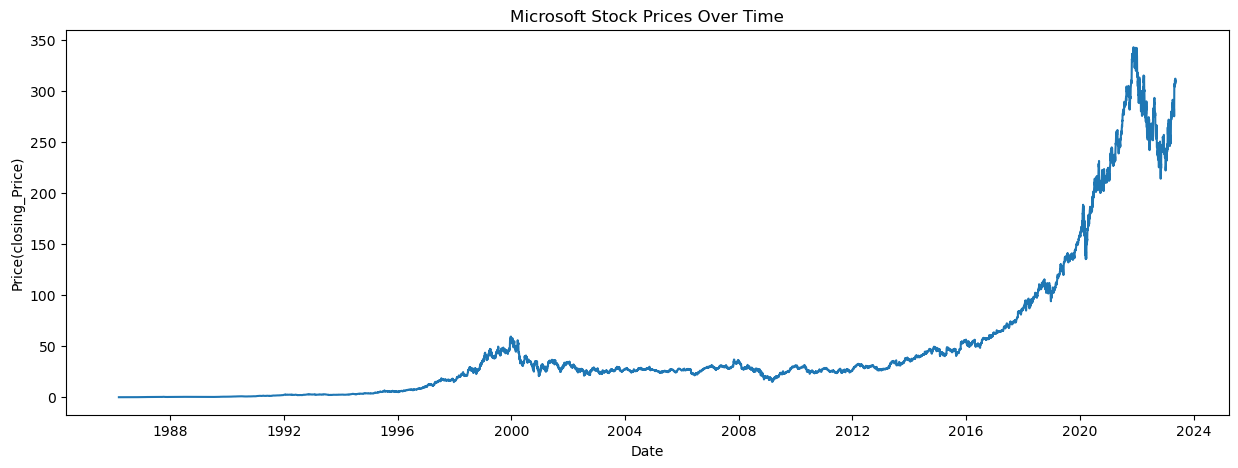

In [21]:
plt.figure(figsize=(15,5))
plt.plot(df['Price(closing_Price)'])
plt.title('Microsoft Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price(closing_Price)')

plt.show()

# Time series decomposition

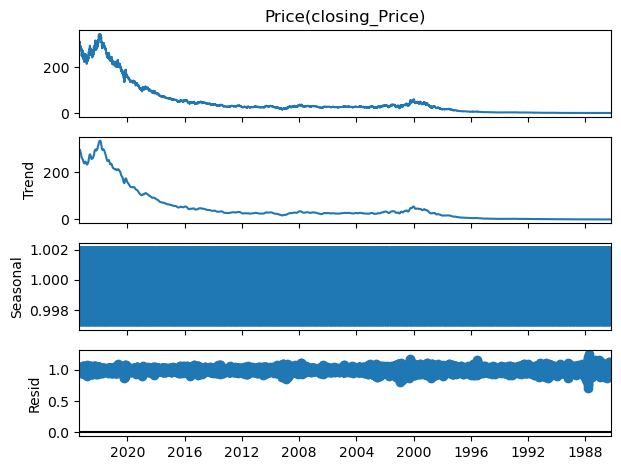

In [22]:
result=seasonal_decompose(df['Price(closing_Price)'],model='multiplicative',period=30)
result.plot()
plt.show()

In [23]:
# Stationary check
from statsmodels.tsa.stattools import adfuller

In [24]:
result=adfuller(df['Price(closing_Price)'])
print('ADF Stastic:',result[0])
print('p-value:',result[1])

ADF Stastic: -4.280056561728943
p-value: 0.0004808944331261283


In [25]:
# First-order differencing
df['differenced']=df['Price(closing_Price)'].diff().dropna()
df.head()

,Price(closing_Price),Open,High,Low,Volume,differenced
Date,,,,,,
2023-05-15,309.46,309.10,309.90,307.59,16290000,NaN
2023-05-12,308.97,310.55,310.65,306.60,19770000,-0.49
2023-05-11,310.11,310.10,311.12,306.26,31680000,1.14
2023-05-10,312.31,308.62,313.00,307.67,30080000,2.20
2023-05-09,307.00,308.00,310.04,306.31,21340000,-5.31


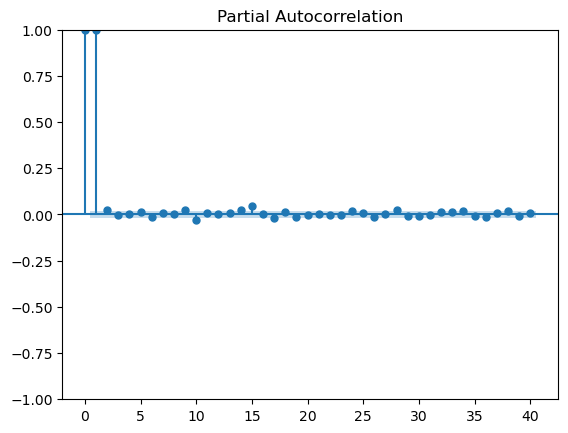

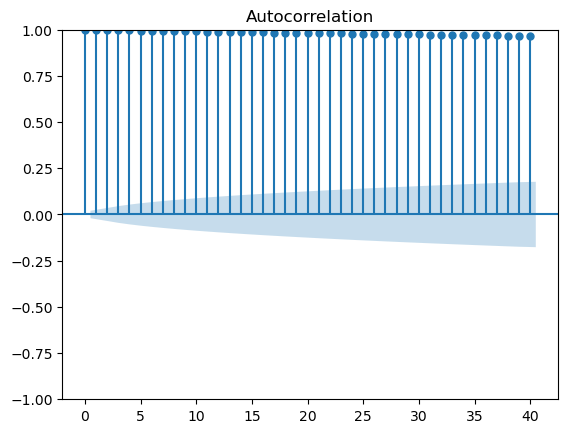

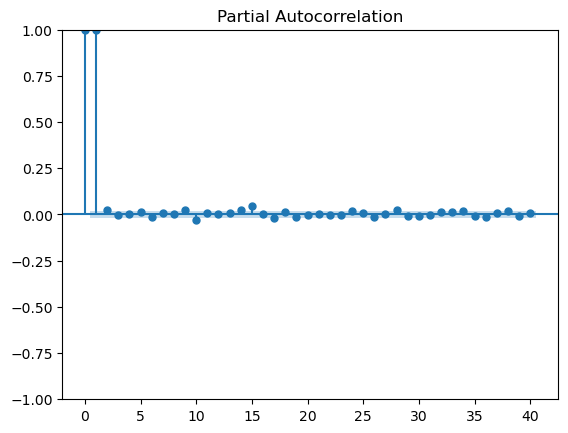

In [26]:
plot_acf(df['Price(closing_Price)'].dropna())
plot_pacf(df['Price(closing_Price)'].dropna())

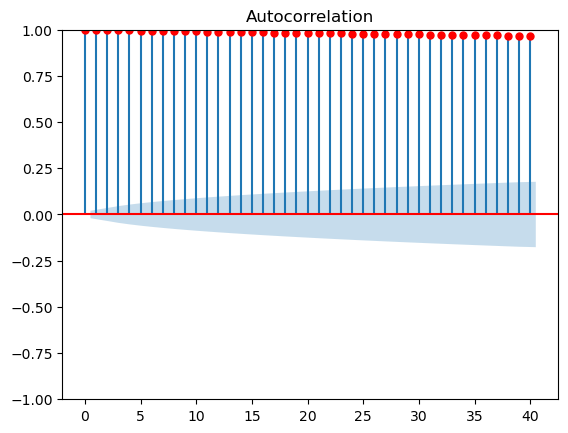

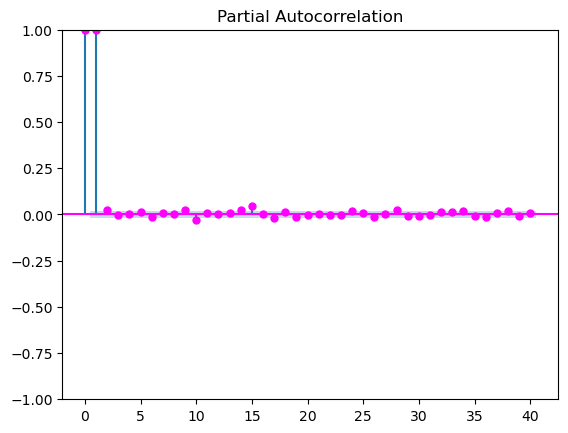

In [27]:
# ACF and PACf plots for model selection
plot_acf(df['Price(closing_Price)'],color='red')
plot_pacf(df['Price(closing_Price)'],color='magenta')

plt.show()

In [40]:
# ARIMA model
p_values=range(0,3)
d_values=range(0,2)
q_values=range(0,3)

best_aic=float('inf')
best_order=None

for p, d, q in itertools.product(p_values,d_values,q_values):
    try:
        aic=result.aic
        if aic<best_aic:
            best_aic=aic
            best_order=(p, d, q)
    except:
        continue
        
print('best ARIMA order:',best_order)

best ARIMA order: None


In [83]:

# Assuming you've selected appropriate p, d,q values based on ACF and PCAF plots
model=ARIMA(df['Price(closing_Price)'],order=(p,d,q))
fit_model=model.fit()

C:\Users\mayur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mayur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mayur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mayur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mayur\anaconda3\Lib\site-

In [84]:
# display model summary
print(fit_model.summary())

                                SARIMAX Results                                 
Dep. Variable:     Price(closing_Price)   No. Observations:                 9369
Model:                   ARIMA(2, 1, 2)   Log Likelihood              -17620.662
Date:                  Fri, 22 Dec 2023   AIC                          35251.324
Time:                          16:49:04   BIC                          35287.050
Sample:                               0   HQIC                         35263.456
                                 - 9369                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2480      0.127      1.949      0.051      -0.001       0.497
ar.L2          0.2170      0.043      5.022      0.000       0.132       0.302
ma.L1         -0.3457      0.127    

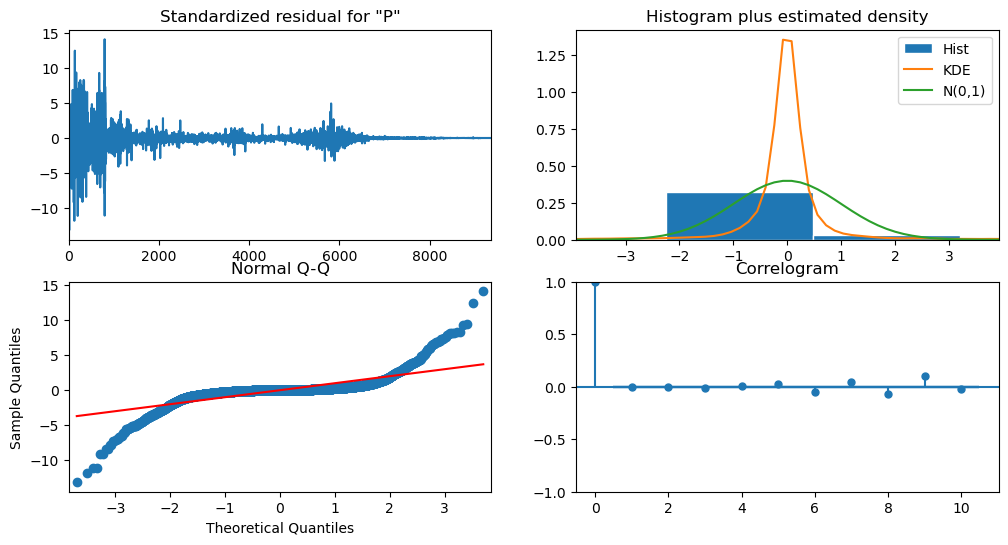

In [85]:
# plot residuals
fit_model.plot_diagnostics(figsize=(12,6))
plt.show()

In [86]:
# Forecasting
Forecast_steps=30
forecast=fit_model.get_forecast(steps=Forecast_steps)

C:\Users\mayur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\mayur\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [99]:
forecast_index=pd.date_range(df['Price(closing_Price)'].index[-1],periods=Forecast_steps , freq=df['Price(closing_Price)'].index.freq)

In [100]:
forecast_mean=forecast.predicted_mean

In [101]:
# model evalution 
actual_values=df['Price(closing_Price)'].tail(Forecast_steps)
mae=mean_absolute_error(actual_values,forecast_mean)
mse=mean_squared_error(actual_values,forecast_mean)
rmse=np.sqrt(mse)

In [102]:
# Print evaluation metrics
print(f'Mean Absolute Error(MAE):{mae:.2f}')
print(f'Mean Squared Error(MSE):{mse:.2f}')
print(f'Root Mean Squared Error(RMAE):{rmse:.2f}')

Mean Absolute Error(MAE):0.00
Mean Squared Error(MSE):0.00
Root Mean Squared Error(RMAE):0.01


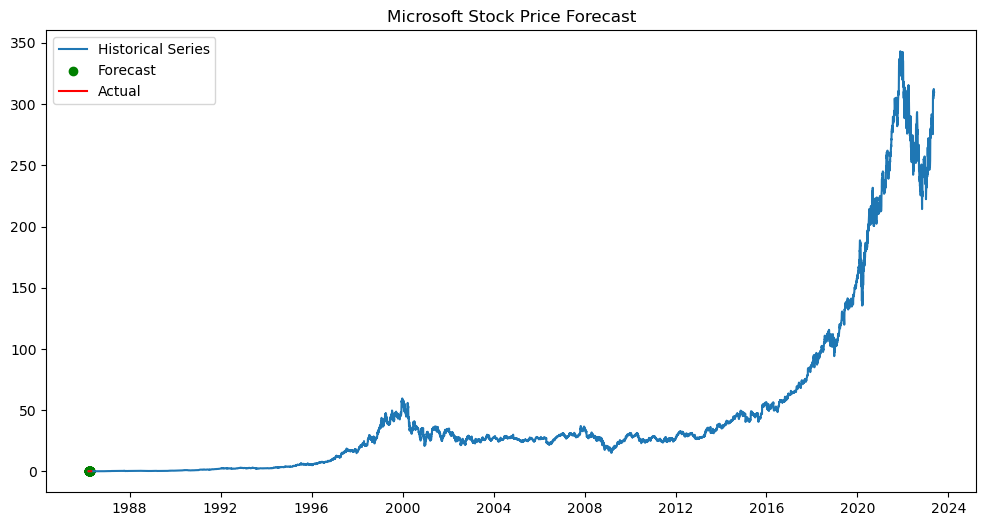

In [107]:
# VIsualization of actual VS forecasted values
plt.figure(figsize=(12,6))
plt.plot(df['Price(closing_Price)'],label='Historical Series')
plt.scatter(forecast_index,forecast_mean,label='Forecast',color='green')
plt.plot(actual_values.index,actual_values,label='Actual',color='red')
plt.title('Microsoft Stock Price Forecast')
plt.legend()
plt.show()
